In [1]:
import pandas as pd
from langdetect import detect
import numpy as np
from tqdm import tqdm
from time import sleep
import matplotlib.pyplot as plt
import translators as ts
from transformers import pipeline
from miskibin import get_logger
logger = get_logger(__name__)
from requests.exceptions import HTTPError
import argostranslate.package
import argostranslate.translate

Using region Lower Silesia server backend.
c:\Users\miskibin\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
file = 'reviews.csv'
df = pd.read_csv(file)
# set id as index
df.set_index('id', inplace=True)
# drop duplicates
df.drop_duplicates(inplace=True)
# drop null values
df.dropna(inplace=True)
# drop date, reviewer_id, reviewer_name
df = df.drop(['date', 'reviewer_id', 'reviewer_name'], axis=1)
df.head()

,listing_id,comments
id,,
161221787,445660,Very close to tram stops which made it easy to...
162008966,445660,Heleen is a great and super kind host. Very ca...
108465506,20168,"Alex was very welcoming, gave instructions how..."
109101247,20168,He allowed us to check in an hour earlier whic...
109701581,20168,I felt like we were lucky to stay in such a ce...


In [3]:
# save to csv
df.to_csv('reviews.csv')

(array([3.31285e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 7.00000e+01,
        0.00000e+00, 2.00000e+00, 0.00000e+00, 7.00000e+00, 1.90000e+01,
        2.31000e+02, 2.82000e+02, 1.33000e+02, 2.35

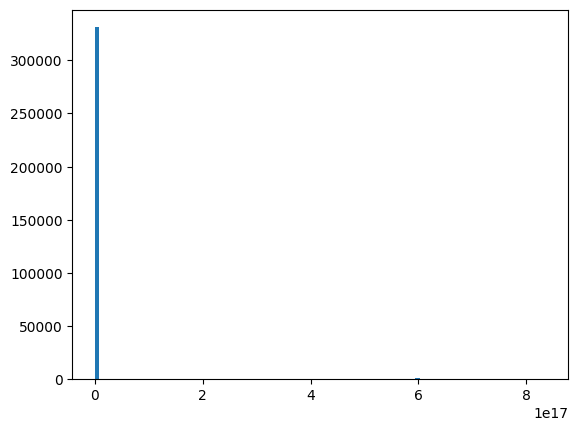

In [3]:
#plot listing_id distribution
plt.hist(df['listing_id'], bins=100)

In [4]:
# cast comments to string
df = df[df['comments'].notnull()]
df['comments'] = df['comments'].astype(str)

In [5]:
def translate_to_en(phrase: str, source_lang) -> str:
    if not isinstance(phrase, str):
        return np.nan
    try:
        translatedText = argostranslate.translate.translate(phrase, source_lang, 'en')
    except Exception as e:
        return np.nan    # Translate
    return translatedText
    new_df = pd.DataFrame(columns=['idx', 'original_review', 'translated_review', 'sentiment', 'confidence'])


In [7]:
file = 'new_reviews.csv'
temp_df = pd.DataFrame(columns=['index', 'original_review', 'translated_review'])
temp_df.to_csv(file, index=False)
last_i = 10600

In [8]:
# new empty df with idx, orginal_review, translated_review, sentiment, confidence
indexes = df.index.tolist()
bar = tqdm(total=len(indexes), desc='Processing')
temp_df = pd.DataFrame(columns=['index', 'original_review', 'translated_review']) 
for i, idx in enumerate(indexes):
    comment = df['comments'][idx][:400]
    comment = comment.replace('<br/>', ' ')
    comment = comment.replace('<br/', ' ')
    if not isinstance(comment, str) or len(comment) < 10:
        continue
    lang = detect(comment)
    bar.set_description(f'Lang: {lang}')
    bar.update()
    
    if lang != 'en':
        bar.set_description(f"comment: {comment[:15]}")
        translated_comment = translate_to_en(comment, source_lang=lang)
    else:
        translated_comment = None
    if not isinstance(comment, str) or len(comment) < 10:
        continue    
    temp_df = pd.concat([temp_df, pd.DataFrame({'index': idx, 'original_review': comment, 'translated_review': translated_comment}, index=[0])])
    if i % 1000 == 0:
        # save to csv
        old_df = pd.read_csv(file)
        new_df = pd.concat([old_df, temp_df])
        new_df.to_csv(file, index=False)
        temp_df = pd.DataFrame(columns=['index', 'original_review', 'translated_review'])


comment: Daniel,         | 486/339786 [01:43<32:35:56,  2.89it/s]                               
 
comment: Liebe Susanne,  | 3159/339786 [12:30<25:01:23,  3.74it/s]                               
comment:    1%|          | 4139/339786 [16:24<50:57:12,  1.83it/s]                               
comment: Hallo Mirjam,   | 8162/339786 [29:00<15:35:01,  5.91it/s]                               
comment: Merci!▎         | 9371/339786 [32:25<2:23:59, 38.25it/s]                                
comment: В Амстердаме на:   3%|▎         | 10629/339786 [34:05<42:00:21,  2.18it/s]               

KeyboardInterrupt: 

In [ ]:

random_reviews = [r for r in random_reviews if isinstance(r, str)]
sentiment_pipeline = pipeline("sentiment-analysis")
preds = sentiment_pipeline(random_reviews)

In [ ]:

reviews_df  = pd.DataFrame(random_reviews, columns=['reviews'])
reviews_df['sentiment'] = [pred['label'] for pred in preds]
reviews_df['score'] = [pred['score'] for pred in preds]
reviews_df

In [ ]:
plt.style.use('ggplot')
reviews_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


In [ ]:
# print all reviews with negative sentiment
neg = reviews_df[reviews_df['sentiment'] == 'NEGATIVE']
for i, row in neg.iterrows():
    print(row['score'],  row['reviews'])
    print('-'*50)

In [ ]:
# plot score
plt.hist(reviews_df['score'])
plt.title('Sentiment Score')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()
